<a href="https://colab.research.google.com/github/rontalapoojareddy/ADS_Assignment/blob/main/ADS_Lab_4(b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Age  AnnualIncome  SpendingScore  Segment
0  26.986857  31610.043122      27.244579        0
1  24.446943  32523.530369      35.205000        0
2  27.590754  34873.730594      40.041950        0
3  31.092119  34742.109234      40.375845        0
4  24.063387  23800.487844      36.399476        0
Accuracy: 0.97


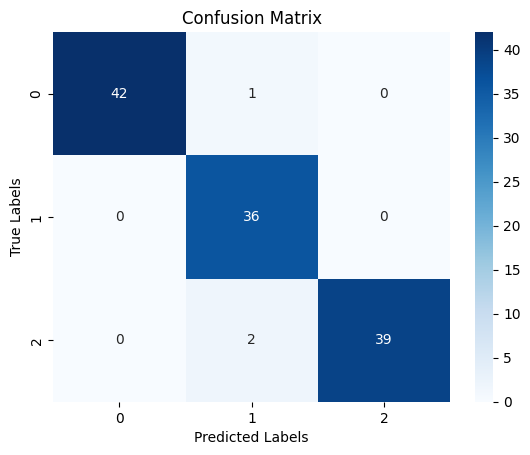

In [ ]:
import pandas as pd
df=pd.read_excel("/content/knn_customers.xlsx")
print(df.head())
X=df[["AnnualIncome","SpendingScore"]]
y=df["Segment"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)

y_pred=knn.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",round(acc,2))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


#####
import numpy as np
x_min,x_max=X["AnnualIncome"].min()-1,X["AnnualIncome"].max()+1
y_min,y_max=X["SpendingScore"].min()-1,X["SpendingScore"].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
Z=knn.predict(scaler.transform(np.c_[xx.ravel(),yy.ravel()]))
Z=Z.reshape(xx.shape)
plt.figure(figsize=(7,6))

plt.contourf(xx,yy,Z,alpha=0.3,cmap="viridis")
plt.scatter(X["AnnualIncome"],X["SpendingScore"],c=y,cmap="viridis",edgecolor='k')
plt.title("KNN Classification")
plt.xlabel("AnnualIncome")
plt.ylabel("SpendingScore")
plt.show()